# ドル円相場の季節性分析  
ドル円相場の季節性（日・月・曜日ごと）の集計と可視化。
## 1. 準備 
### 1-1. パッケージのインポート
必要なパッケージをインポートする。  
為替データのダウンロードのため別途作成した以下のスクレイピング用のスクリプトを使用。  
https://github.com/MitsuruFujiwara/BOJScraper

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from BOJScraper import BOJScraper

%matplotlib inline

### 1-2. ヒストリカルデータの取得
日本銀行の統計データサイトより為替レートのヒストリカルデータを取得（期間:1990年1月以降）。  
http://www.stat-search.boj.or.jp/index.html

In [2]:
boj = BOJScraper(currency='USD')
df = boj.getData(1999, 2018)
df = df['1999-01-01':'2019-03-31']
df.tail()

,東京市場 ドル・円 スポット 9時時点,東京市場 ドル・円 スポット 最高値,東京市場 ドル・円 スポット 最安値,東京市場 ドル・円 スポット 17時時点,東京市場 ドル・円 スポット 中心相場,東京市場 ドル・円 スポット出来高,東京市場 ドル・円 スワップ出来高
date,,,,,,,
2018-09-03,111.14,111.19,110.85,110.97,111.01,2797.0,41085.0
2018-09-04,111.09,111.46,110.90,111.46,111.08,5408.0,67196.0
2018-09-05,111.47,111.71,111.40,111.46,111.50,4624.0,61519.0
2018-09-06,111.46,111.51,111.17,111.32,111.25,5178.0,51783.0
2018-09-07,110.50,110.77,110.39,110.75,110.50,7264.0,72334.0


### 1-3. 目的変数の設定
目的変数となる東京時間9時〜17時の変化率の分布を確認。

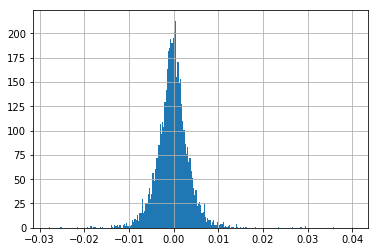

In [3]:
df.columns = ['start', 'high', 'low', 'close', 'TTM', 'volume_spot', 'volume_swap']
df['chg']= (df['close'] - df['start']) / df['start']
df['chg'].hist(bins=255)

上記の変化率の正負を基準に0-1の二値ラベルを生成する。

In [4]:
df['label'] = df['chg'].apply(lambda x: 1 if x > 0 else 0)
df['label'].value_counts()

0    2578
1    2257
Name: label, dtype: int64

### 1-4. 季節性変数の生成   
日付(day), 月(month), 曜日(weekday), 週番号(week of year)の4つを追加する。

In [5]:
df['day'] = df.index.day
df['month'] = df.index.month
df['weekday'] = df.index.weekday
df['weekofyear'] = df.index.weekofyear

## 2. 季節性の確認  
### 2-1. 日付ごとの季節性  
上記で生成した変化率と二値ラベルに対し、日付ごとの季節性を確認する。  

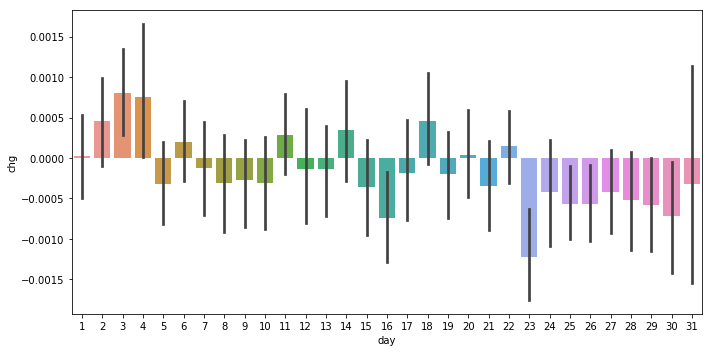

In [6]:
# 変化率
plt.figure(figsize=(10, 5))
sns.barplot(x ='day', y ='chg',data=df)
plt.tight_layout()

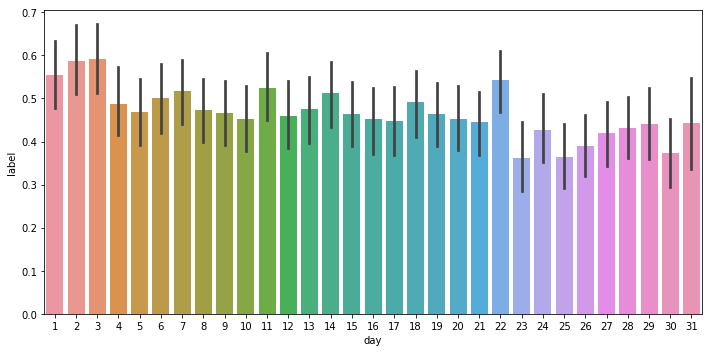

In [7]:
# ラベル
plt.figure(figsize=(10, 5))
sns.barplot(x ='day', y ='label',data=df)
plt.tight_layout()

### 2-2. 月ごとの季節性  

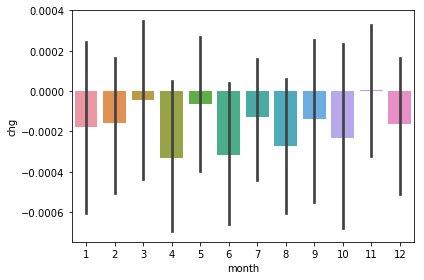

In [8]:
# 変化率
sns.barplot(x ='month', y ='chg',data=df)
plt.tight_layout()

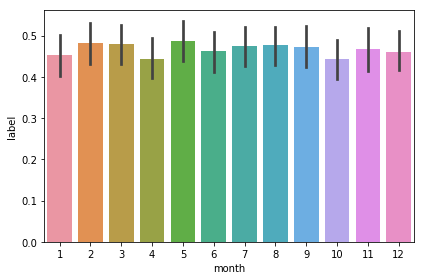

In [9]:
# ラベル
sns.barplot(x ='month', y ='label',data=df)
plt.tight_layout()

### 2-3. 曜日ごとの季節性  

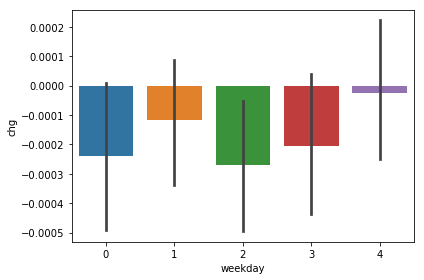

In [10]:
# 変化率
sns.barplot(x ='weekday', y ='chg',data=df)
plt.tight_layout()

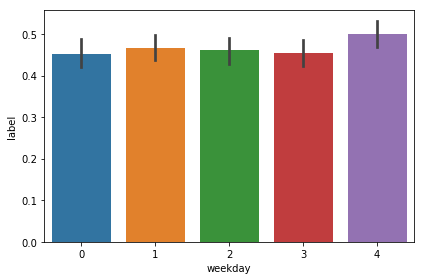

In [11]:
# ラベル
sns.barplot(x ='weekday', y ='label',data=df)
plt.tight_layout()

### 2-4. 週番号ごとの季節性  

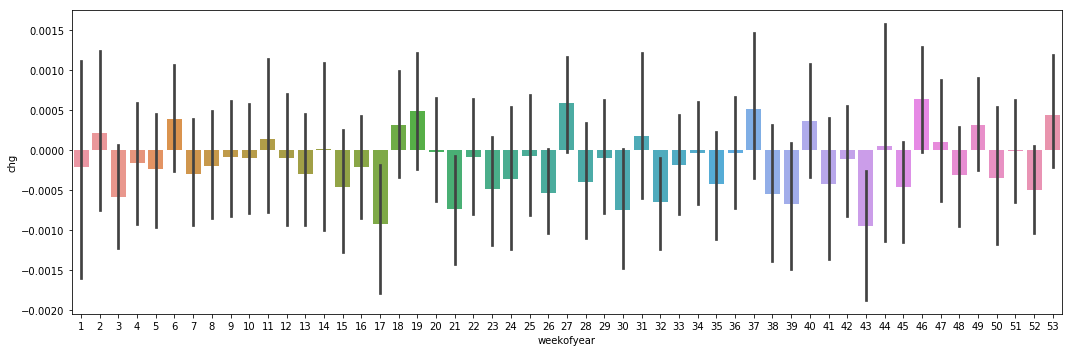

In [12]:
# 変化率
plt.figure(figsize=(15, 5))
sns.barplot(x ='weekofyear', y ='chg',data=df)
plt.tight_layout()

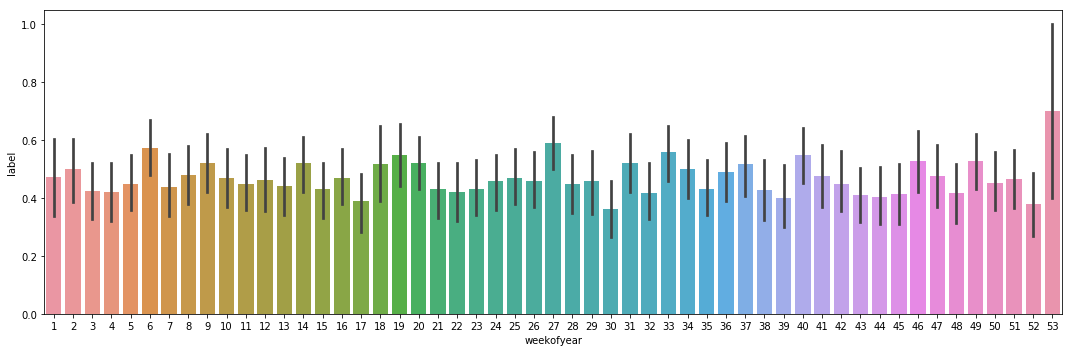

In [13]:
# ラベル
plt.figure(figsize=(15, 5))
sns.barplot(x ='weekofyear', y ='label',data=df)
plt.tight_layout()

## 3. その他の季節性  
### 3-1. 日付と月の組み合わせ  

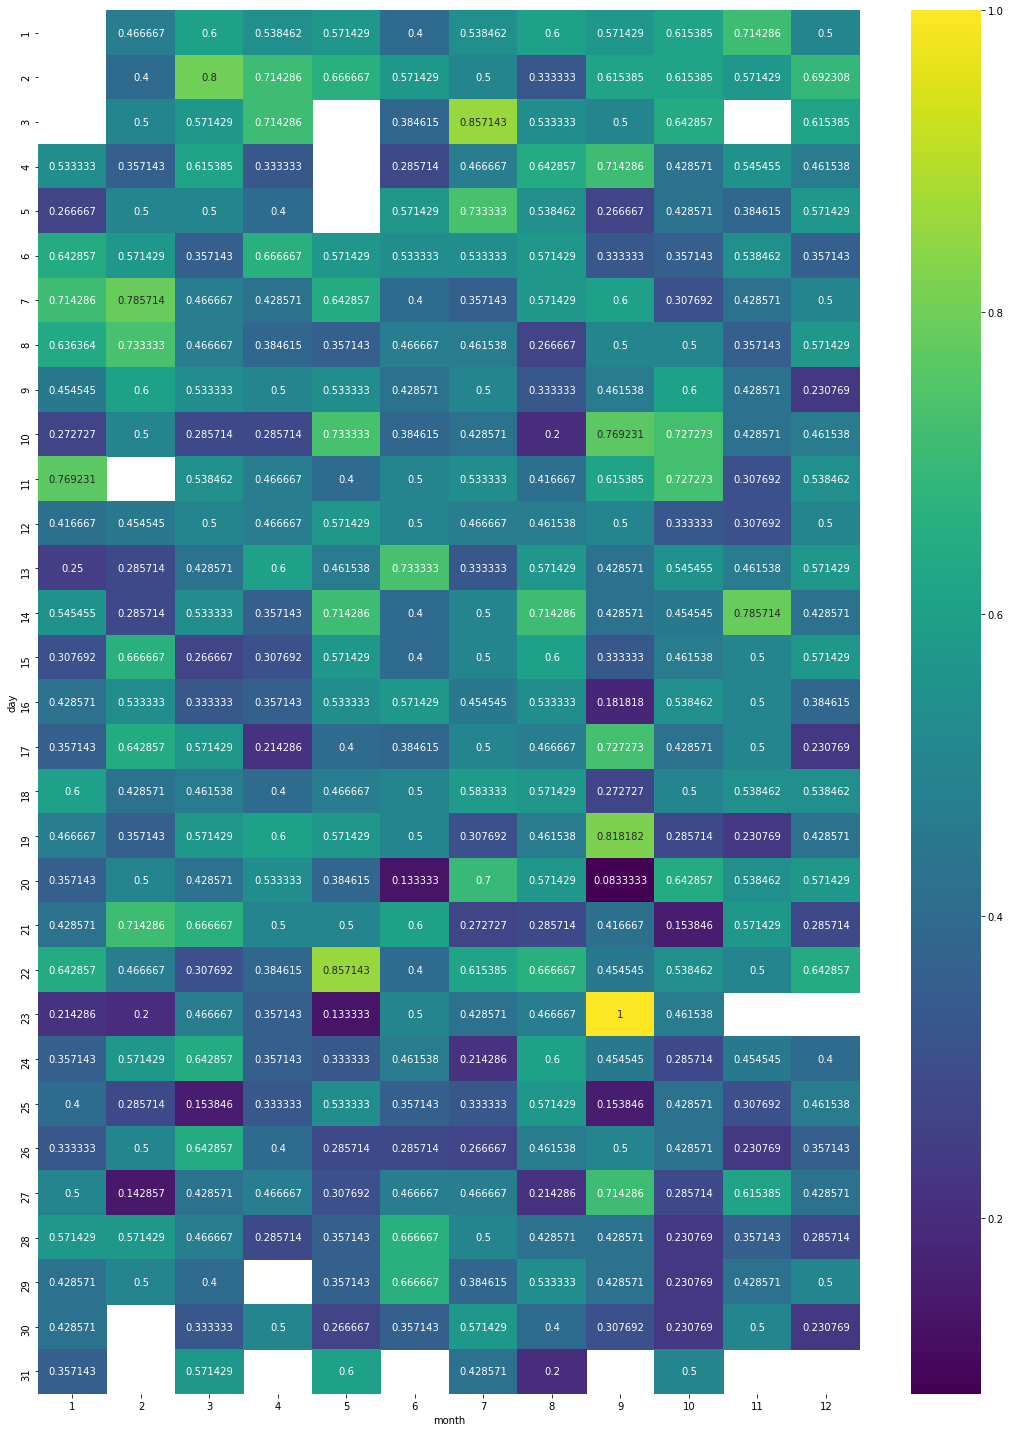

In [14]:
day_month=df.groupby(['day', 'month'])['label'].mean().rename('label').reset_index()
plt.figure(figsize=(15, 20))
sns.heatmap(day_month.pivot('day', 'month', 'label'), annot=True, fmt="g", cmap='viridis')
plt.tight_layout()
plt.savefig('day_month.png')

### 3-2. 日付と曜日の組み合わせ  

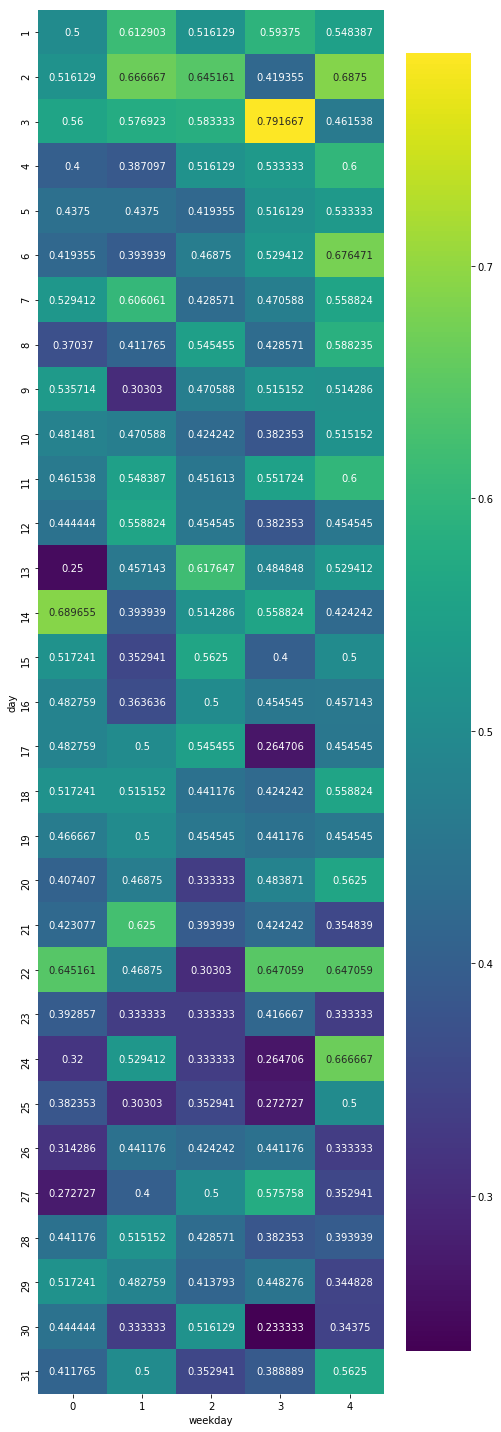

In [15]:
day_weekday=df.groupby(['day', 'weekday'])['label'].mean().rename('label').reset_index()
plt.figure(figsize=(7, 20))
sns.heatmap(day_weekday.pivot('day', 'weekday', 'label'), annot=True, fmt="g", cmap='viridis')
plt.tight_layout()
plt.savefig('day_weekday.png')

### 3-3. 月と曜日の組み合わせ  

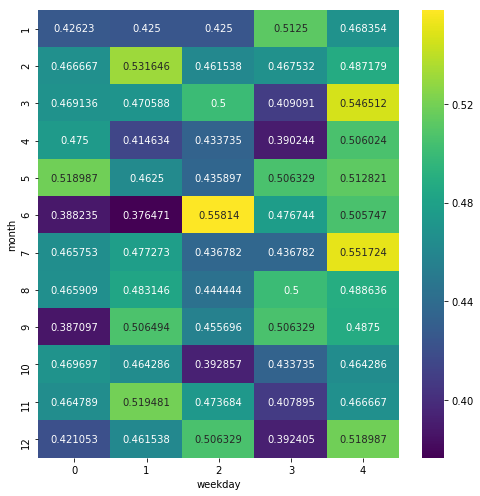

In [16]:
month_weekday=df.groupby(['month', 'weekday'])['label'].mean().rename('label').reset_index()
plt.figure(figsize=(7, 7))
sns.heatmap(month_weekday.pivot('month', 'weekday', 'label'), annot=True, fmt="g", cmap='viridis')
plt.tight_layout()
plt.savefig('month_weekday.png')